In [68]:
print("Hello Ai developers!")

Hello Ai developers!


### Data review

In [69]:
import pandas as pd 

In [70]:
train_df = pd.read_csv("../database/titanic/train.csv")
test_df = pd.read_csv("../database/titanic/test.csv")
test_answer_df = pd.read_csv("../database/titanic/gender_submission.csv")

In [71]:
test_df.shape

(418, 11)

In [72]:
train_df.shape

(891, 12)

In [73]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [74]:
train_df = train_df.drop(['Name', 'Ticket'], axis=1)
test_df = test_df.drop(['Name', 'Ticket'], axis=1)

In [75]:
test_df['Survived'] = test_answer_df["Survived"]

In [76]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,892,3,male,34.5,0,0,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,7.0000,NaN,S,1
2,894,2,male,62.0,0,0,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,12.2875,NaN,S,1


In [77]:
full_df = pd.concat([train_df, test_df], sort=False)


In [78]:
full_df.shape

(1309, 10)

In [79]:
full_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [80]:
full_df.set_index("PassengerId")

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
1305,0,3,male,NaN,0,0,8.0500,NaN,S
1306,1,1,female,39.0,0,0,108.9000,C105,C
1307,0,3,male,38.5,0,0,7.2500,NaN,S


In [81]:
full_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [82]:
import seaborn as sns

<Axes: ylabel='Frequency'>

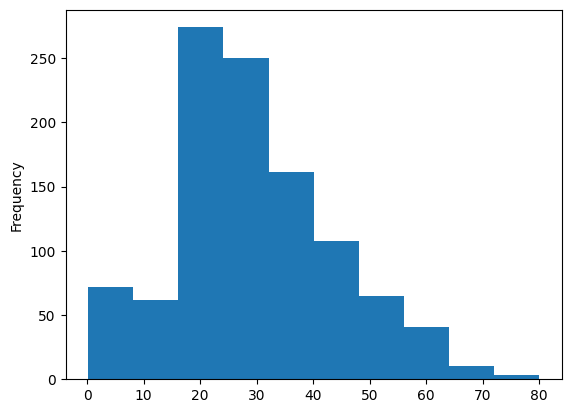

In [83]:
full_df.Age.plot.hist()

<Axes: ylabel='Frequency'>

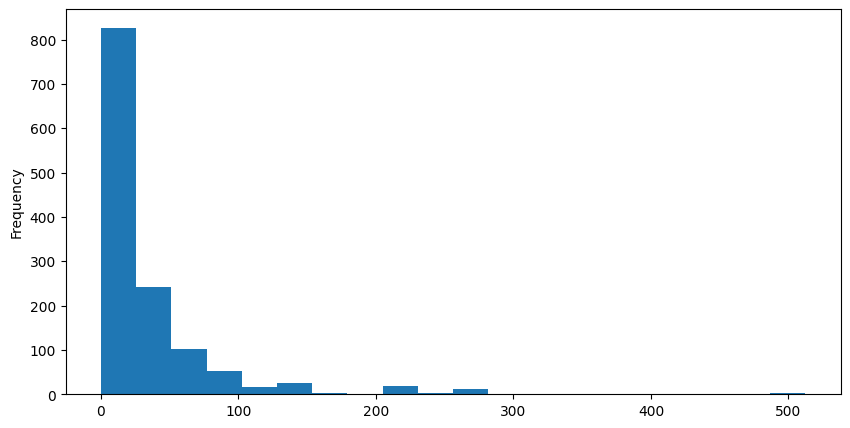

In [84]:
full_df.Fare.plot.hist(bins=20,figsize=(10,5))

<Axes: xlabel='SibSp', ylabel='count'>

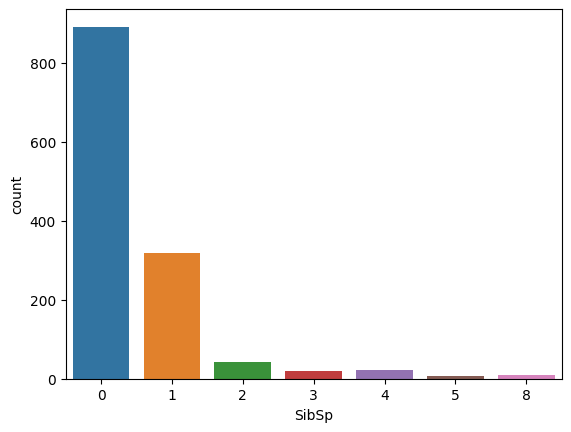

In [85]:
sns.countplot(x="SibSp",data= full_df)

### Data processing

In [86]:
full_df.isnull()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,True,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,True,False,False,False,True,False


In [87]:
full_df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Sex               0
Age             263
SibSp             0
Parch             0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<Axes: >

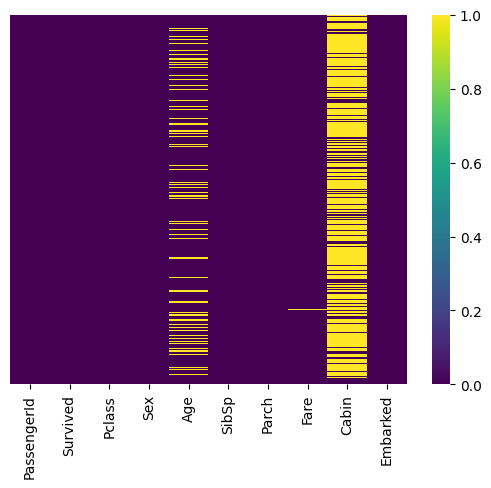

In [88]:
sns.heatmap(full_df.isnull(),yticklabels= False,cmap="viridis")

In [89]:
full_df.drop(["Cabin"],axis=1,inplace=True)

In [90]:
full_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            263
SibSp            0
Parch            0
Fare             1
Embarked         2
dtype: int64

In [91]:
train_df = full_df[:len(train_df)]
test_df = full_df[len(train_df):]

In [92]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [93]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [94]:
clean_train= train_df.dropna()

In [95]:
clean_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [96]:
test_df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [97]:
clean_test= test_df.dropna()

In [98]:
clean_test.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [99]:
clean_test.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [100]:
train_clean_one_hot = pd.get_dummies(clean_train, columns=["Sex", "Embarked", "Pclass"])

In [101]:
test_clean_one_hot = pd.get_dummies(clean_test, columns=["Sex", "Embarked", "Pclass"])

In [102]:
train_clean_one_hot.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.0,1,0,7.2500,False,True,False,False,True,False,False,True
1,2,1,38.0,1,0,71.2833,True,False,True,False,False,True,False,False
2,3,1,26.0,0,0,7.9250,True,False,False,False,True,False,False,True
3,4,1,35.0,1,0,53.1000,True,False,False,False,True,True,False,False
4,5,0,35.0,0,0,8.0500,False,True,False,False,True,False,False,True


In [103]:
train_clean_one_hot.dtypes

PassengerId      int64
Survived         int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Sex_female        bool
Sex_male          bool
Embarked_C        bool
Embarked_Q        bool
Embarked_S        bool
Pclass_1          bool
Pclass_2          bool
Pclass_3          bool
dtype: object

In [104]:
test_clean_one_hot.dtypes

PassengerId      int64
Survived         int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Sex_female        bool
Sex_male          bool
Embarked_C        bool
Embarked_Q        bool
Embarked_S        bool
Pclass_1          bool
Pclass_2          bool
Pclass_3          bool
dtype: object

Our datas is ready to be fed into the furnace.

### Model Training

In [105]:
train_y = train_clean_one_hot["Survived"]

In [106]:
train_x = train_clean_one_hot.drop(["Survived"], axis=1)

In [107]:
test_y = test_clean_one_hot["Survived"]

In [108]:
test_x = test_clean_one_hot.drop(["Survived"],axis=1)

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
my_model = LogisticRegression(max_iter= 1000)

In [111]:
my_model.fit(train_x,train_y)

LogisticRegression(max_iter=1000)

In [120]:
sample = test_x.sample(1)

In [121]:
prediction = my_model.predict(sample)

In [122]:
print(prediction)

[0]


In [126]:
my_model.score(train_x,train_y)


0.7935393258426966

In [127]:
my_model.score(test_x,test_y)

0.9003021148036254

In [128]:
my_model01 = LogisticRegression(C= 0.1, max_iter=1000)

In [129]:
my_model01.fit(train_x,train_y)

LogisticRegression(C=0.1, max_iter=1000)

In [131]:
print(my_model01.score(train_x,train_y))
print(my_model01.score(test_x,test_y))

0.8047752808988764
0.9063444108761329


In [132]:
from sklearn.metrics import confusion_matrix

In [133]:
pred = my_model01.predict(test_x)

In [134]:
confusion_matrix(test_y,pred)

array([[178,  26],
       [  5, 122]], dtype=int64)

In [139]:
my_model.coef_

array([[ 3.60889306e-04, -4.09125893e-02, -3.37876215e-01,
        -6.51927591e-02,  2.14798659e-03,  1.55866901e+00,
        -9.95656771e-01,  5.77241043e-01, -1.85732448e-01,
         1.71503646e-01,  1.27420515e+00,  2.28773035e-01,
        -9.39965945e-01]])

In [140]:
my_model01.coef_

array([[ 3.26730245e-04, -3.29390028e-02, -2.81045553e-01,
        -5.88305486e-02,  5.43227752e-03,  1.05530014e+00,
        -1.03612589e+00,  2.36340192e-01, -1.16064884e-01,
        -1.01101056e-01,  6.96924381e-01,  1.19017825e-01,
        -7.96767954e-01]])

The model is complete. **90.6%** success was observed in the test data.